In [10]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from itertools import chain

In [11]:
# Create pandas dataframe from csv
df = pd.read_csv("../log/timeLog.csv", sep=" ", header=0)
result = df.groupby('k').mean()

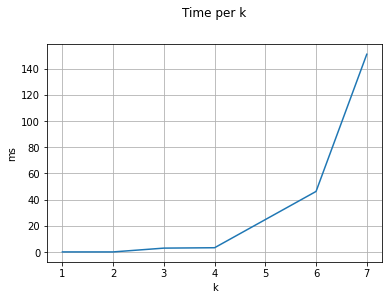

In [12]:
plt.plot(result.index, result['millis'])
plt.xlabel('k')
plt.ylabel('ms')
plt.title('Time per k', y=1.1)
plt.grid()
plt.savefig('plots/TimePlot.png',  bbox_inches='tight')
plt.show()